In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [21]:
X = pd.DataFrame(iris["data"][:, 3])
y = (iris["target"] == 2).astype(np.int)

In [22]:
X.head()

,0
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2


In [23]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

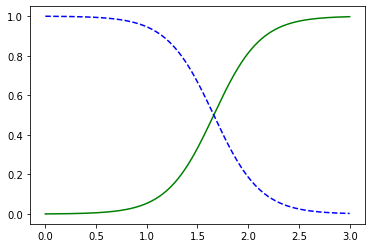

In [25]:
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

In [26]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### Softmax Regression

In [27]:
X = iris["data"][:, (2,3)]
y = iris["target"]

In [29]:
softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 10)

In [30]:
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
softmax_reg.predict([[5, 2]])

array([2])

In [32]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

### *Code Basic*- code

In [33]:
df = pd.read_csv(r'C:\Users\windows10\Desktop\Hands_on_Machine_Learniing\code_basics\ML\7_logistic_reg\insurance_data.csv')

In [34]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


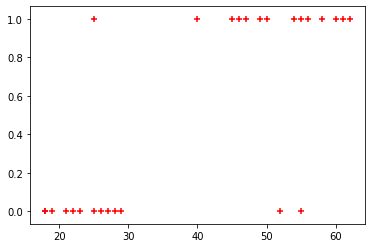

In [36]:
plt.scatter(df.age, df.bought_insurance, marker = '+', color = "red")

In [37]:
# split the data
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, train_size = 0.8)

In [42]:
print(len(X_train))
print(len(X_test))

21
6


In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [46]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
X_test

,age
9,61
6,55
16,25
15,55
26,23
4,46


In [49]:
y_predicted = model.predict(X_test)

In [50]:
model.predict_proba(X_test)

array([[0.01027397, 0.98972603],
       [0.03696755, 0.96303245],
       [0.96369409, 0.03630591],
       [0.03696755, 0.96303245],
       [0.97621705, 0.02378295],
       [0.21443532, 0.78556468]])

#### Accuracy of the Model

In [51]:
model.score(X_test,y_test)

0.6666666666666666

In [52]:
y_predicted

array([1, 1, 0, 1, 0, 1], dtype=int64)

In [53]:
model.coef_

array([[0.21796133]])

In [54]:
model.intercept_

array([-8.72782674])

#### Lets define a sigmoid function and do the maths in hand

In [58]:
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [59]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [60]:
age = 35
prediction_function(age)

0.4850044983805899

#### 0.485 is less than 0.5 which means person with 35 age will not buy insurance

In [61]:
age = 43
prediction_function(age)

0.568565299077705

#### 0.568 is more than 0.5 which means person with 43 will buy the insurance